## Seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set() # -> setar o tema padrão do seaborn

In [5]:
sns.__version__

'0.11.1'

In [8]:
df = sns.load_dataset('tips') # Carrega os datasets que estão presentes no framework

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Gráfico de linha

<AxesSubplot:xlabel='day', ylabel='total_bill'>

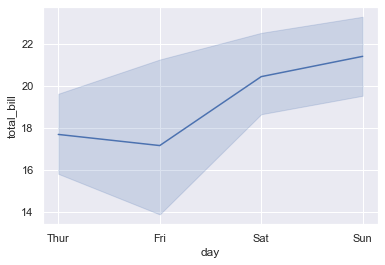

In [14]:
sns.lineplot(data=df, x='day', y='total_bill')
#parte em azul é o desvio padrão. Os pontos são por padrão a media

## Gráfico de dispersão

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

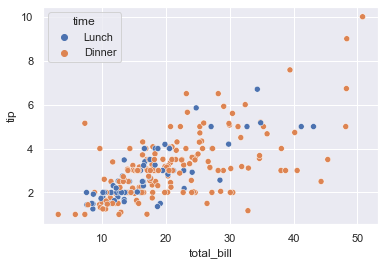

In [18]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')

## Gráfico de barras

<AxesSubplot:xlabel='day', ylabel='total_bill'>

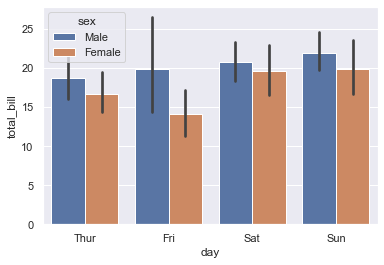

In [21]:
#altura da barra é a media, como os pontos do grafico de linhas
sns.barplot(data=df, x='day', y='total_bill', hue='sex')

## Gráfico de distribuição
- distplot

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

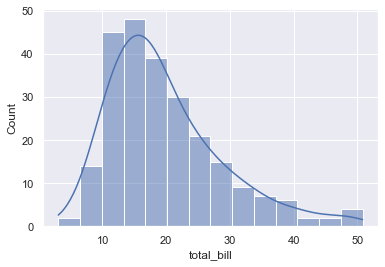

In [27]:
sns.histplot(df['total_bill'], kde=True)

## jointplot

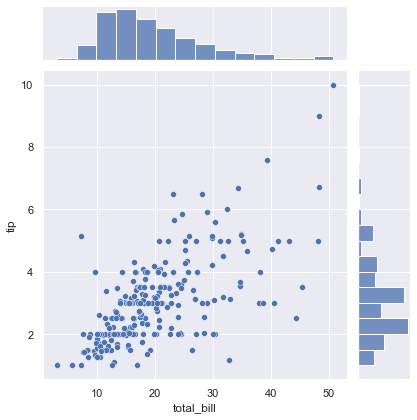

In [35]:
sns.jointplot(data=df, x='total_bill', y='tip')

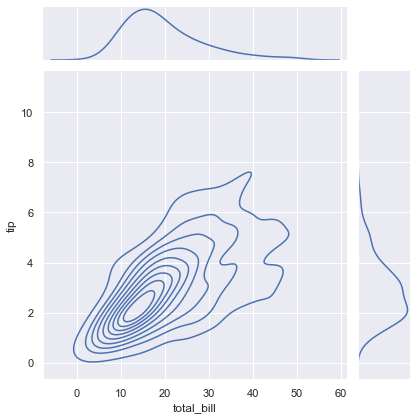

In [33]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='kde')

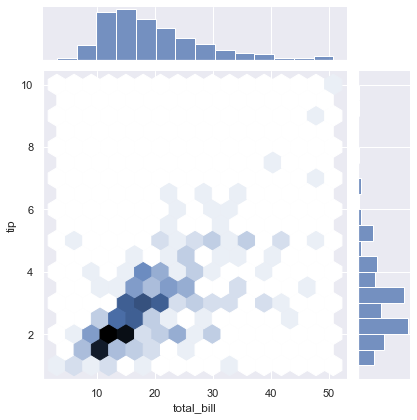

In [34]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')

## Pairplot

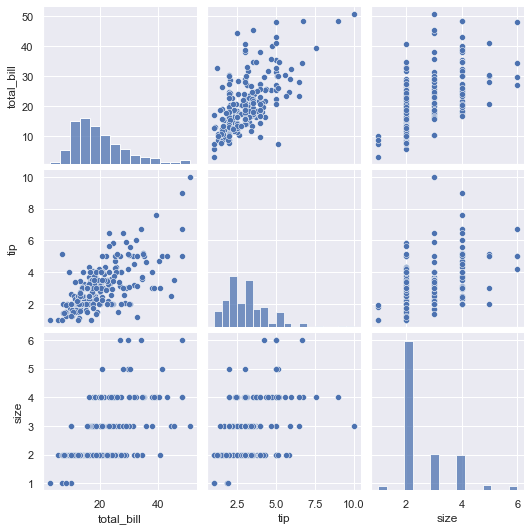

In [36]:
sns.pairplot(df)

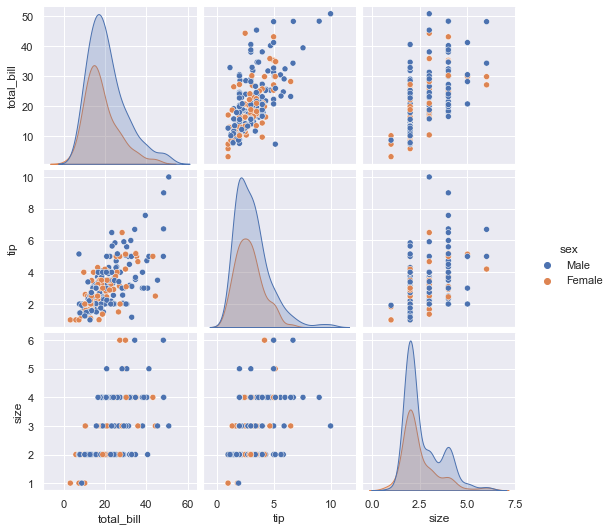

In [37]:
sns.pairplot(df, hue='sex')

## Gráficos Categóricos

- Countplot

<AxesSubplot:xlabel='time', ylabel='count'>

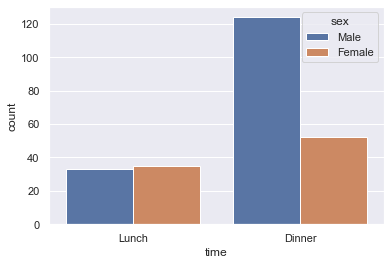

In [40]:
sns.countplot(data=df, x='time', hue='sex') #conta os elementos

## Boxplot

In [42]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='tip'>

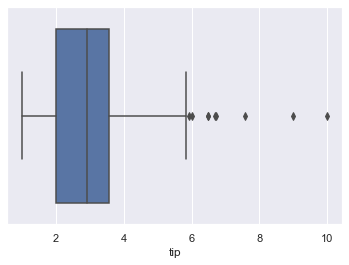

In [45]:
sns.boxplot(data=df, x='tip')

In [46]:
q1 = df['tip'].quantile(0.25)
q2 = df['tip'].quantile(0.5)
q3 = df['tip'].quantile(0.75)

In [47]:
IQR = q3 - q1

In [50]:
l_inf = max(df['tip'].min(), q1 - (1.5 * IQR))
l_sup = min(df['tip'].max(), q3 + (1.5 * IQR))

l_inf, l_sup

(1.0, 5.906249999999998)

<AxesSubplot:xlabel='tip'>

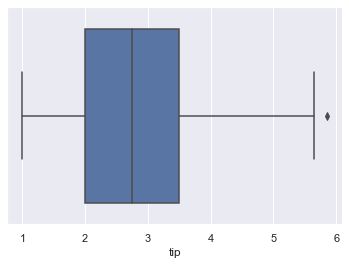

In [51]:
sns.boxplot(data=df[(df['tip'] < l_sup)], x='tip')

## Lmplot

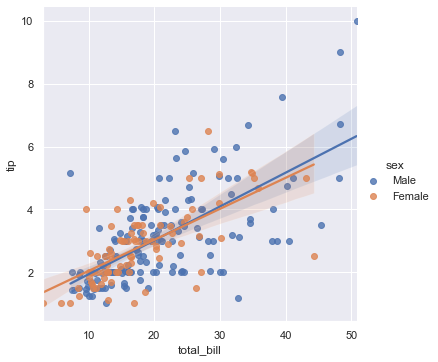

In [55]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='sex')

## Gráficos de Matriz
### Heatmap

In [56]:
data = np.random.randint(1, 100, (20,20))

<AxesSubplot:>

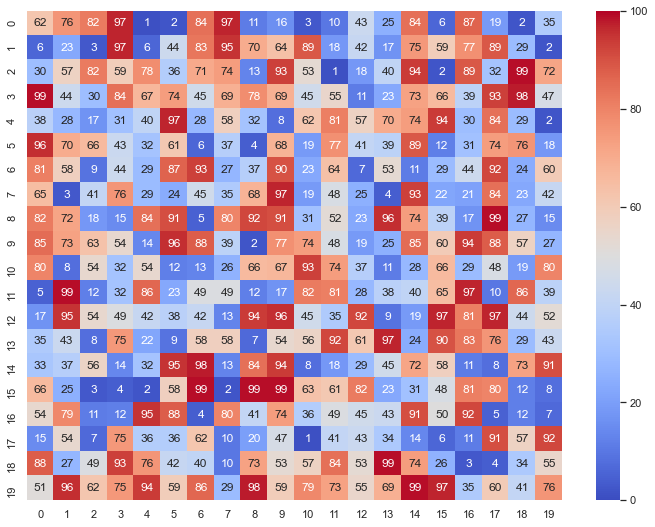

In [62]:
plt.figure(figsize=(12,9))
sns.heatmap(data, vmin=0, vmax=100, cmap='coolwarm', annot=True)

In [65]:
df.corr() # Calcula a correlação entre os dados

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

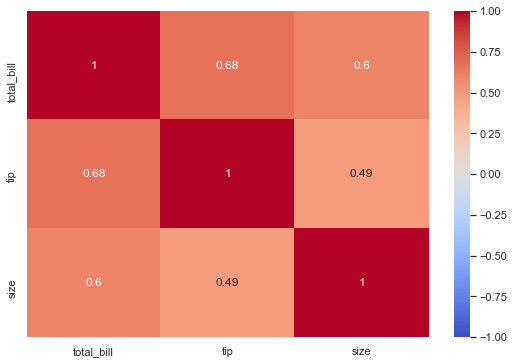

In [71]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

## Exercícios:
- Explorar os datasets do iris e titanic, e tirar algumas conclusões

In [3]:
iris = sns.load_dataset('iris')
titanic = pd.read_csv('../data_sets/titanic_train.csv')

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Survived'>

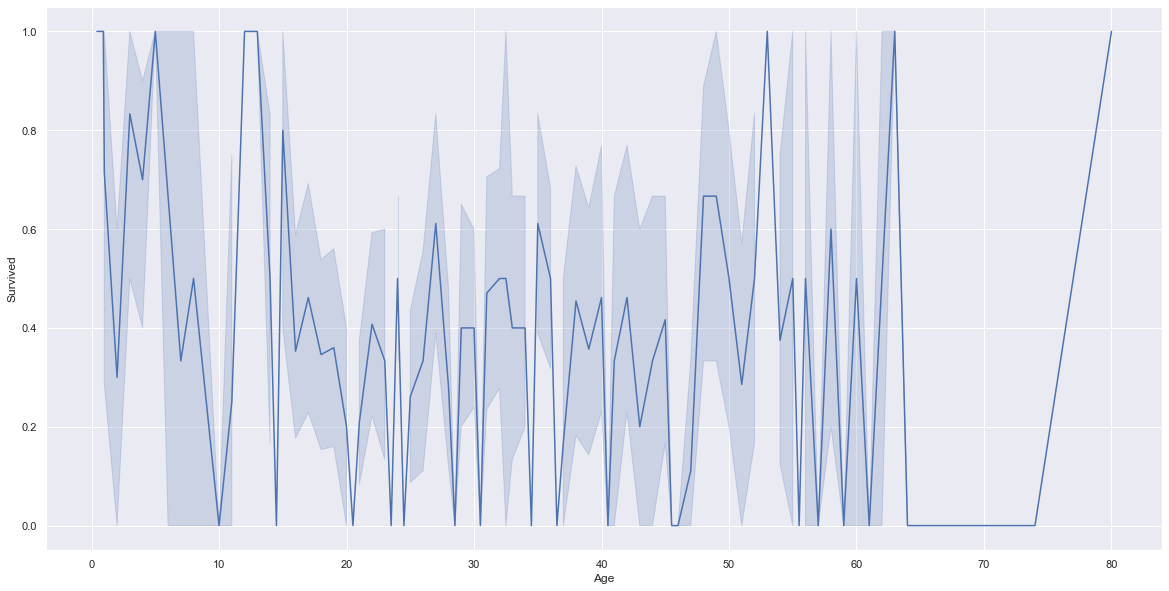

In [81]:
plt.figure(figsize=(20,10))

sns.lineplot(data=titanic, x='Age', y='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

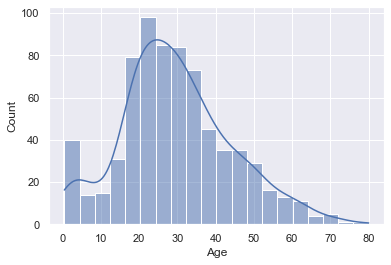

In [132]:
sns.histplot(titanic['Age'], kde=True)
#Mais pessoas entre 20 e 40 anos

- Conclusão: Pessoas entre 20 e 45 morreram mais

In [88]:
classes = titanic.groupby('Pclass').sum()
classes

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


<AxesSubplot:xlabel='Survived', ylabel='count'>

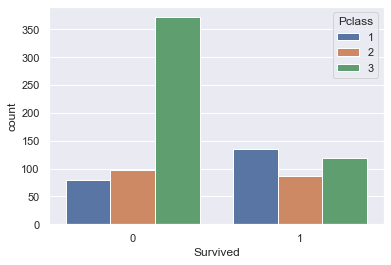

In [92]:
sns.countplot(data=titanic, x='Survived', hue='Pclass')

In [108]:
titanic['Sex'] = titanic['Sex'].map({'female' : 0, 'male' : 1})

In [110]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

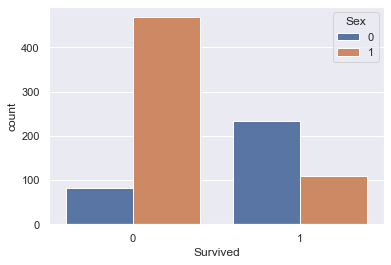

In [129]:
sns.countplot(data=titanic, x='Survived', hue='Sex')

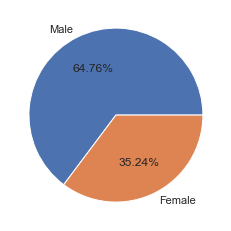

In [128]:
sexos = titanic['Sex'].value_counts()
plt.pie(sexos, labels=['Male', 'Female'], autopct='%.2f%%')
plt.show()

## Iris

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

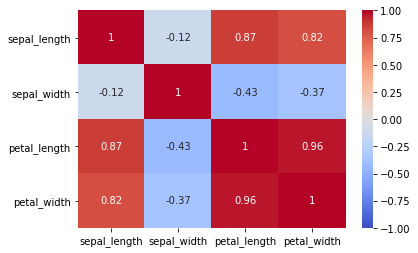

In [16]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

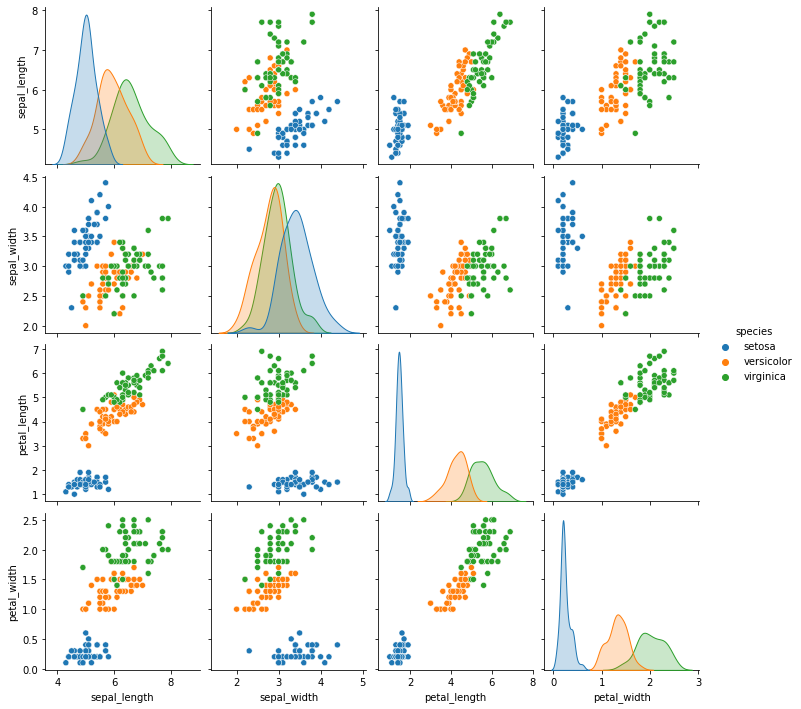

In [5]:
sns.pairplot(df, hue='species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

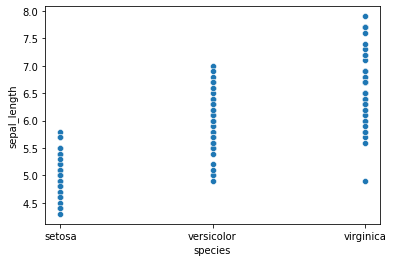

In [12]:
sns.scatterplot(data=df, x='species', y='sepal_length')

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

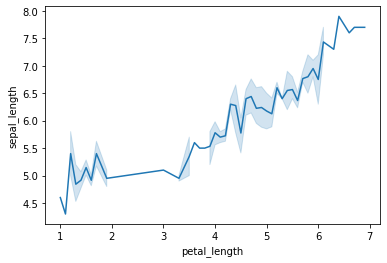

In [13]:
sns.lineplot(data=df, x='petal_length', y='sepal_length')

c:\users\vinic\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

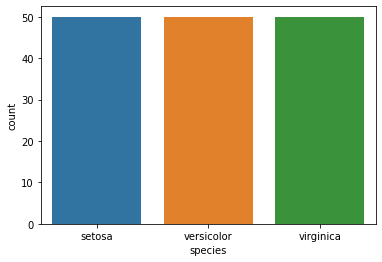

In [17]:
sns.countplot(df['species'])